<h1 style="font-family:'poppins'">Decision Tree Classifier</h1>
<h2 style="font-family:'poppins'">Author: Nabeel Raza</h2>
<hr>

**Task:** Create a Decision Tree Classifier and visualize it graphically.

### Importing and reading data

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Extracting Features

In [78]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = data[features]
y = data[['Species']]

In [79]:
y.nunique()
# Iris-virginica, Iris-versicolor, Iris-setosa

Species    3
dtype: int64

### Data Preprocessing

In [80]:
from sklearn.preprocessing import LabelEncoder

# encoding the Species
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

c:\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Splitting training and test data

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

### Creating model and fitting the model

In [82]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', random_state=0)

model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Predicting with our test data

In [83]:
predictions = model.predict(X_valid)
predictions

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

### Comparing predictions with the original 

In [84]:
comparison = pd.DataFrame({"Original":y_valid, "Predicted":predictions})
comparison.head()

,Original,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0


### Measuring accuracy

In [85]:
from sklearn.metrics import accuracy_score

accuracy_score(y_valid, predictions)

1.0

### Visualizing

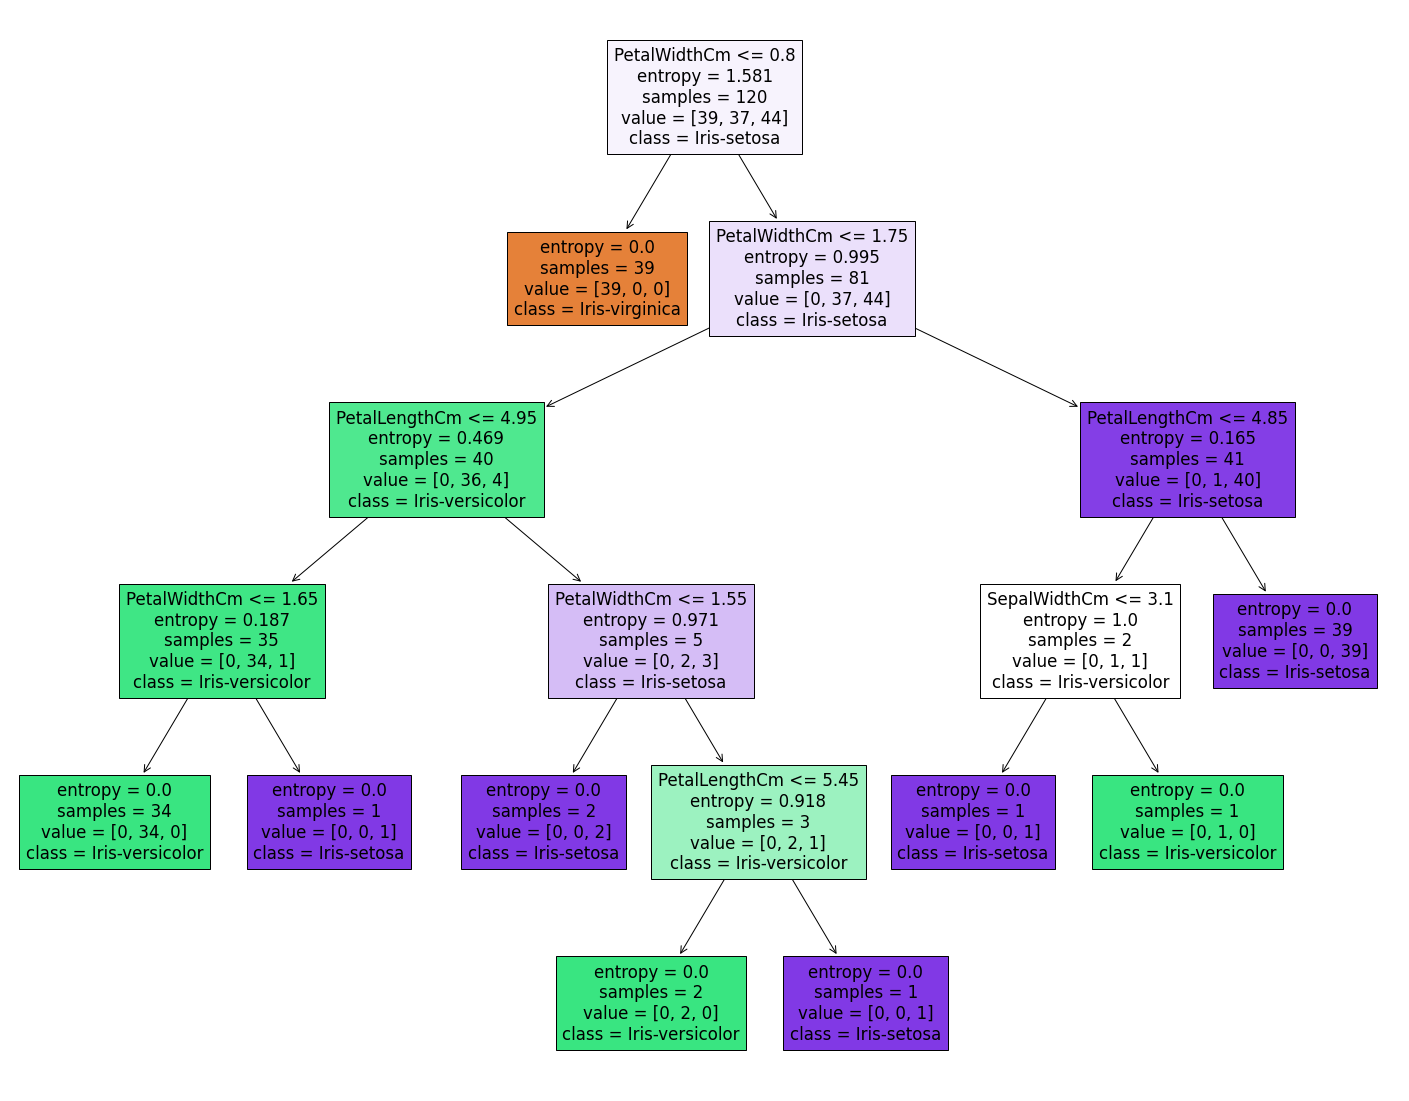

In [86]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
_ = plot_tree(model, 
              feature_names=features, 
              class_names=['Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], 
              filled=True)